# <p style="text-align: center;">MIS 382N: Advanced Predictive Modeling</p>
# <p style="text-align: center;">Assignment 2</p>
## <p style="text-align: center;">Total points: 60</p>
## <p style="text-align: center;">Due: Wed, October 05, by 11:59pm</p>
## <p style="text-align: center;">Caroline Nelson, Erik Honore</p>


Your homework should be written in a **Jupyter notebook** (except for Q6). Please submit **only one** ipynb file from each group, and include the names of all the group members in your ipynb file. Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting.

# Question 1: Sampling (6 pts)

A recent survey estimated that $30\%$ of all Europeans aged 20 to 22 have driven under the influence of drugs or alcohol, based on a simple "Yes or No" question. A similar survey is being planned for Americans. The survey designers want the  $90\%$ confidence interval to have a margin of error of at most $\pm0.09$.

(a) Find the necessary sample size needed to conduct this survey assuming that the expected percentage of "yes" answers will be very close to that obtained from the European survey? (2 pts)

(b) Suppose the tolerance level was kept the same but the confidence level needs to increase to $95\%$. What is the required sample size for this new specification? (2 pts)

(c) If one does not know where the true "$p$" may lie, one can conservatively conduct a survey assuming the worst case (in terms of required minimum sample size)  scenario of  $p = 0.5$. Redo part (b) for this "worst case" scenario. (2 pts)

#### Part A

$n >= p(1-p)(z_{\alpha/2} / ε )^2$ where $\epsilon=0.09$, $p=0.3$, and $z_{\alpha/2}=1.645$

$n >= 0.3(0.7)(1.645/0.09)^2$

$n >= 70.156$

#### Part B

$n >= p(1-p)(z_{\alpha/2} / ε )^2$ where $\epsilon=0.09$, $p=0.3$, and $z_{\alpha/2}=1.96$

$n >= 0.3(0.7)(1.96/0.09)^2$

$n >= 99.597$

#### Part C

$n >= p(1-p)(z_{\alpha/2} / ε )^2$ where $\epsilon=0.09$, $p=0.5$, and $z_{\alpha/2}=1.96$

$n >= 0.5(0.5)(1.96/0.09)^2$

$n >= 118.568$


# Question 2 (2+2 = 4 points)

View the video at:

https://www.youtube.com/watch?v=jbkSRLYSojo

(Hans Rosling's 200 Countries, 200 Years, 4 Minutes) and answer the following questions:

1. How many variables are being visualized in the “moving bubble plots” video (list them)?

2. Identify a variable that is “zoomed into”, i.e., examined at a sub-category or more detailed level.


FACTOID: Rosling’s gapminder visualization

(see https://www.youtube.com/user/Gapcast for some more insightful videos) can now be

readily used by you via Google Charts: https://developers.google.com/chart/interactive/docs/gallery

Just plug in your own variables into “Bubble Chart” under the URL above and go!

#### Answers

1. There are 6 variables- life expectancy (y), income (x), population size (size of ball), and region (color), time, and country.
2. Countries were split into cities/subregions to show differences within countries.

# Question 3: Principal Component Analysis (PCA) (10 pts)

Download the US imports dataset from Canvas, or from [here](https://www.census.gov/foreign-trade/statistics/product/enduse/imports/enduse_imports.xlsx).

This code will clean the data and format it so that it is PCA-ready:

In [1]:
import pandas as pd

df = pd.read_csv('enduse_imports.csv')

# gather columns we care about
df = df.loc[:,['CTY_DESC','COMM_DESC','value_15']]
df.columns = pd.Series(['Country','Good','Value'])

# not a country, remove
df = df[df['Country'] != 'World Total']

# some countries had imports recorded twice
# remove these countries for simplicity
importCount = df.groupby(['Country','Good']).count().iloc[:,0]
duplicatedImports = importCount[importCount > 1]
countriesWithDuplicates = duplicatedImports.index.get_level_values(0).unique()
print "duplicated countries: "
print [str(country) for country in countriesWithDuplicates]
df = df[df['Country'].isin(countriesWithDuplicates) == False]

# remove countries that don't export
totalImports = df[['Country','Value']].groupby('Country').sum().iloc[:,0]
countriesWithNoImport = totalImports[totalImports == 0].index
print "countries that don't trade with USA: "
print [str(country) for country in countriesWithNoImport]
df = df[df['Country'].isin(countriesWithNoImport) == False]

# reshape so that each type of good has its own column
df = df.pivot(index='Country',columns='Good',values='Value')
df = df.fillna(0)

# import PCA
from sklearn.decomposition import PCA

duplicated countries: 
['Montenegro', 'Serbia', 'Sudan']
countries that don't trade with USA: 
['Cuba', 'Korea, North', 'Netherlands Antilles']


In [2]:
df.iloc[:5,:5] # display first five rows and columns

Good,"Agricultural machinery, equipment","Alcoholic beverages, excluding wine","Apparel, household goods - cotton","Apparel, household goods - wool","Apparel, textiles, nonwool or cotton"
Country,,,,,
Afghanistan,3105.0,0.0,10739.0,7314.0,11942.0
Albania,0.0,34741.0,2752171.0,50838.0,1298224.0
Algeria,0.0,0.0,0.0,0.0,0.0
Andorra,0.0,0.0,351.0,0.0,0.0
Angola,0.0,24505.0,0.0,0.0,0.0


Now gather the top two principal components from this dataset and  
(a) Make a scatter plot with the first component as the x-axis and the second as the y-axis. (3 pts)

(b) Find the names of the six countries with the highest first component (these should be clear outliers). (2 pts)

(c) Given the results of parts (a) and (b), one might theorize that the first component roughly represents the total volume of exports to the US.  Using the components\_ attribute, gather the loadings of the first component.  Also use the original dataframe to gather the total imports to the US for each good.  Divide this list of total imports per good by the total US imports period, so that for each good we know what percent of imports it accounted for.  Make a scatter plot with this value on the x-axis and the first component's loadings on the right. (3 pts)

(d) For the four goods with the highest component loadings, print the name of the good and the percent of imports it accounts for.  Briefly comment on whether you think the first component represents the total volume of imports, or whether it has another interpretation - no right or wrong answer. (2 pts)

#### PART A

In [3]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
X=np.array(df)
pca=PCA(n_components=2)
pca = pca.fit(X)


In [4]:
comp1=pca.components_[0]
comp2=pca.components_[1]


Populating the interactive namespace from numpy and matplotlib


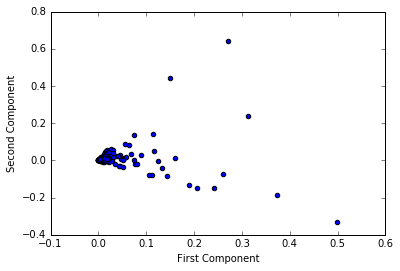

In [5]:
import matplotlib.pyplot as plt
%pylab inline
plt.scatter(comp1,comp2, marker='o')
plt.xlabel("First Component")
plt.ylabel("Second Component")

#### PART B

Find the names of the six countries with the highest first component (these should be clear outliers).

In [6]:
pca_fit = pca.fit_transform(X)

pca_frame = pd.DataFrame(pca_fit, index= df.index.values, columns = ['PC-1', 'PC-2'])

pca_frame_sorted_PC1 = pca_frame.sort_values(by= 'PC-1',axis=0, ascending = False)

pca_frame_sorted_PC1[:6]

,PC-1,PC-2
China,9.550198e+10,-4.312230e+10
Mexico,4.687003e+10,3.118667e+10
Canada,2.912037e+10,5.642660e+10
Japan,1.734897e+10,2.579931e+10
Germany,1.366577e+10,2.089604e+10
"Korea, South",1.169313e+10,1.004833e+10


#### PART C

Given the results of parts (a) and (b), one might theorize that the first component roughly represents the total volume of exports to the US.  Using the components\_ attribute, gather the loadings of the first component.  Also use the original dataframe to gather the total imports to the US for each good.  Divide this list of total imports per good by the total US imports period, so that for each good we know what percent of imports it accounted for.  Make a scatter plot with this value on the x-axis and the first component's loadings on the right.

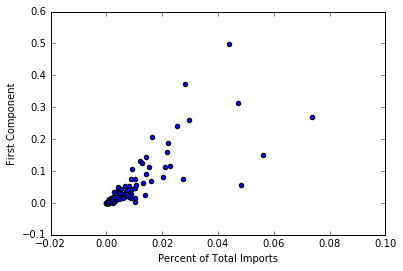

In [8]:
#find the sum of each product column
total_imports_perGood = df.apply(sum)

#gather just the values to graph against the 1st component loadings(which are the Beta's)
total_imports_perGood_array = total_imports_perGood.values

#need to find total overall
grand_total_imports = sum(total_imports_perGood)
grand_total_imports

#find the percentage of total (this new array will be x axis, loadings will be y axis in plot)
per_good_percentage = total_imports_perGood_array*1.0/grand_total_imports

#finally, graph the loadings of component 1 against these percents of total per product
plt.scatter(per_good_percentage,comp1,marker='o')
plt.xlabel("Percent of Total Imports")
plt.ylabel('First Component')

#### PART D

For the four goods with the highest component loadings, print the name of the good and the percent of imports it accounts for.  Briefly comment on whether you think the first component represents the total volume of imports, or whether it has another interpretation - no right or wrong answer.

In [9]:
#is this asking for highest component loadings for both components? or just the 1st component?

#find the products with the biggest loadings
partD_frame1 = pd.DataFrame(comp1, index=df.columns.values, columns=['Component Loading']) 

#build the frame with the products and their percentages of total
partD_frame2 = pd.DataFrame(per_good_percentage, index=df.columns.values, columns=['Percentage of Total Imports']) 

#merge with percentage frame
merged = pd.merge(partD_frame1,partD_frame2,left_index=True, right_index=True)

#sort, and select out the top 4.
partD_frame2.sort_values(by= 'Percentage of Total Imports',axis=0, ascending = False)[:4]

partD_frame1.sort_values(by='Component Loading',axis=0, ascending = False)[:4]

merged.sort_values(by='Component Loading',axis=0, ascending = False)[:4]

,Component Loading,Percentage of Total Imports
"Cell phones and other household goods, n.e.c.",0.498743,0.043926
Computers,0.373873,0.028141
Other parts and accessories of vehicles,0.312492,0.047283
"Passenger cars, new and used",0.270259,0.073866


The sum of the loadings in principal component 1 do not sum up to the total imports, so the notion that the component is the total imports probably isn't quite right. If anything, I would think that the 1st component represents how to optimally allocate the most variance of imports across all the products by way of these loadings. 

There is also a discrepancy between the top 4 products in terms of highest component loading for the 1st component and the top 4 products in terms of percentage of total imports. When sorting the products by these two, the order is different. Therefore, the variation across the product dimensions is not exactly congruent to the percents out of total imports. When we put together the two concepts as columns and sort according to the top 4 by component loading for the 1st component, the top good doesn't have the largest percentage of total imports. 

# Question 4: Visualization using Bokeh (10 pts)

In this problem, you'll build an interactive visualization. Bokeh is a Python interactive visualization library that targets modern web browsers for presentation. For more information on Bokeh, see http://bokeh.pydata.org/en/latest/. The problem statement is as follows:

Using the [King County House Sales](http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original) data, your goal is to build a Bokeh visualization which allows the user explore how price varies with living room size and year built. You will create a visualization that allows the user to toggle the X axis of a scatter plot between living room size and year built, with the y-axis always being price. Also add the hover tool so that if the user hovers over a datapoint in the living-room-size plot a window pops up that shows year built - and vice versa.

Hints: 
1. You can make use of Select widgets.
2. See: http://bokeh.pydata.org/en/latest/docs/user_guide/interaction.html#javascript-callbacks. Specifically look at the CustomJS for Widgets under Callbacks and the Select widget. 
3. see: http://bokeh.pydata.org/en/latest/docs/user_guide/tools.html#basic-tooltips for a hover tool example.
4. See: http://bokeh.pydata.org/en/latest/docs/reference/plotting.html. Look for the scatter API.
5. See: http://bokeh.pydata.org/en/0.10.0/docs/user_guide/styling.html#labels. For labeling axes.
6. Use output_notebook() from Bokeh to output the plot to your notebook

In [10]:
HouseSales=pd.read_csv('kc_house_data.csv')

In [11]:
HouseSales.columns.values

array(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'], dtype=object)

In [12]:
from bokeh.plotting import figure, show, ColumnDataSource
from bokeh.models import HoverTool
from bokeh.models.widgets import Panel, Tabs
from bokeh.io import output_notebook, show

output_notebook()

source1 = ColumnDataSource(
        data=dict(
            x1=HouseSales['sqft_living'],
            y=HouseSales['price'],
            desc=HouseSales['yr_built']
        )
    )

hover1 = HoverTool(
        tooltips=[
            ("desc", "@desc"),
        ]
    )

source2 = ColumnDataSource(
        data=dict(
            y=HouseSales['price'],
            x2=HouseSales['yr_built'],
            desc=HouseSales['sqft_living']
        )
    )

hover2 = HoverTool(
        tooltips=[
            ("desc", "@desc"),
        ]
    )

p1 = figure(plot_width=400, plot_height=400, tools=[hover1],
           title="Mouse over the dots")
p1.circle('x1', 'y', size=20, source=source1, color='green',alpha=0.5)
tab1 = Panel(child=p1, title="LivingRoomSize")

p2 = figure(plot_width=400, plot_height=400, tools=[hover2])
p2.circle('x2', 'y', size=20, source=source2, color='navy',alpha=0.5)
tab2 = Panel(child=p2, title="YearBuilt")

tabs = Tabs(tabs=[ tab1, tab2 ])


show(tabs)


Loading BokehJS ...

# Question 5: Ridge and Lasso Regression (6+6+4+4=20 points)

In this question, you will explore the application of Lasso and Ridge regression using sklearn package in Python. The dataset is Hitters.csv (available on canvas), which contains performance records and salaries for baseball players. More information on the data can be found [here](https://rdrr.io/cran/ISLR/man/Hitters.html). There are 17 variables: first 16 columns are performance related features and the last column is for Salary. We
wish to predict a baseball player’s Salary using all the 16 performance variables. Use a random state of 42 and a test size of 1/3 to [split the data into training and test](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html). Note: lambda is called alpha in sklearn.

1. Use sklearn.linear_model.Lasso and sklearn.linear_model.Ridge classes to do a [5-fold cross validation](http://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html#example-exercises-plot-cv-diabetes-py) using sklearn's [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html). For the sweep of the regularization parameter, we will look at a grid of values ranging from $\lambda = 10^{10}$ to $\lambda = 10^{-2}$. In Python, you can consider this range of values as follows:

    import numpy as np

    alphas =  10\***np.linspace(10,-2,100)*\*0.5

    Report the best chosen $\lambda$ based on cross validation. The cross validation should happen on your training data using  average MSE as the scoring metric.
2. Run ridge and lasso for all of the parameters specified above (on training data), and plot the coefficients learned for each of them - there should be one plot each for lasso and ridge, so a total of two plots; the plots for different features for a method should be on the same plot (e.g. Fig 6.6 of JW). What do you qualitatively observe when value of the regularization parameter is changed? 
3. Run least squares regression, ridge, and lasso on the training data. For ridge and lasso, use only the best regularization parameter. Report the prediction error (MSE) on the test data for each.
4. Run lasso again with cross validation using [sklearn.linear_model.LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html). Set the cross validation parameters as follows:

    LassoCV(alphas=None, cv=10, max_iter=10000)

    Report the best $\lambda$ based on cross validation. Run lasso on the training data using the best $\lambda$ and report the coefficeints for 16 variables. What do you observe from these coefficients?

#### Part 1

In [13]:
Hitters=pd.read_csv('Hitters.csv')

In [14]:
Hitters.columns.values

array(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists',
       'Errors', 'Salary'], dtype=object)

In [15]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.cross_validation import train_test_split

X = Hitters.drop(['Salary'],axis=1)
target = Hitters['Salary']

X_train, X_test, Y_train, Y_test = train_test_split(X, target, test_size=1.0/3, random_state=42)
kf=KFold(n_splits=5, random_state=42)


alphas = 10**np.linspace(10,-2,100)*0.5

scores = []

for alpha in alphas:
    MSERidge = []
    for train, test in kf.split(X_train):
        ridge= Ridge(random_state=42, alpha=alpha)
        ridge.fit(X_train.iloc[train], Y_train.iloc[train])
        
        pred=ridge.predict(X.iloc[test])
        actual=target[test]
        
        MSE=np.mean((pred-actual)**2)
        
        MSERidge.append(MSE)
    
    scores.append((alpha, np.mean(MSERidge)))
        
best_lambda_ridge = sorted(scores, key=lambda x: x[1])[0][0]

In [16]:
best_lambda_ridge

814.87541731032172

In [17]:
from sklearn.linear_model import Lasso

scores = []

for alpha in alphas:
    MSELasso = []
    for train, test in kf.split(X_train):
        lasso= Lasso(random_state=42, alpha=alpha)
        lasso.fit(X_train.iloc[train], Y_train.iloc[train])
        
        pred=lasso.predict(X.iloc[test])
        actual=target[test]
        
        MSE=np.mean((pred-actual)**2)
        
        MSELasso.append(MSE)
    
    scores.append((alpha, np.mean(MSELasso)))
        
best_lambda_lasso = sorted(scores, key=lambda x: x[1])[0][0]

In [18]:
best_lambda_lasso

37.823166377731454

Using cross validation, the best lambda in our ridge regression model was 814.875, and the best lambda in our lasso regression model was 37.823.

#### Part 2

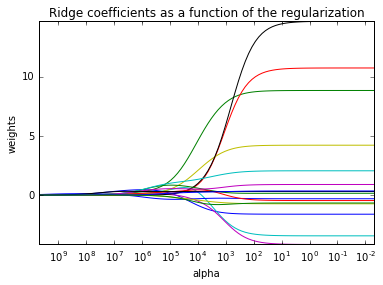

In [19]:
from sklearn.linear_model import Ridge
clf1 = Ridge(fit_intercept=False)

coefs1 = []
for a in alphas:
    clf1.set_params(alpha=a)
    clf1.fit(X_train, Y_train)
    coefs1.append(clf1.coef_.ravel())

ax1 = plt.gca()
ax1.plot(alphas, coefs1)
ax1.set_xscale('log')
ax1.set_xlim(ax1.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

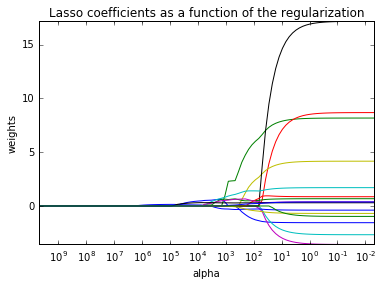

In [20]:
from sklearn.linear_model import Lasso
clf2 = Lasso(fit_intercept=False)

coefs2 = []
for a in alphas:
    clf2.set_params(alpha=a)
    clf2.fit(X_train, Y_train)
    coefs2.append(clf2.coef_)

ax2 = plt.gca()
ax2.plot(alphas, coefs2)
ax2.set_xscale('log')
ax2.set_xlim(ax2.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

Lasso coefficients converge to zero much faster than ridge coefficients.

#### Part 3

In [28]:
ridge1=Ridge(random_state=42, alpha=best_lambda_ridge)
ridge1.fit(X_train, Y_train)
pred_ridge=ridge.predict(X_test)
mean((pred_ridge-Y_test)**2)

158478.23868106084

In [22]:
lasso1=Lasso(random_state=42, alpha=best_lambda_lasso)
lasso1.fit(X_train, Y_train)
pred_lasso=lasso1.predict(X_test)
mean((pred_lasso-Y_test)**2)

152651.49710439585

In [23]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, Y_train)
pred_reg=reg.predict(X_test)
mean((pred_reg-Y_test)**2)

159443.966804683

Linear regression proved to be  somewhat less accurate than ridge, and significantly less accurate than lasso regression.

#### Part 4

In [26]:
from sklearn.linear_model import LassoCV
lcv2=LassoCV(alphas=None, cv=10, max_iter=10000)
lcv2.fit(X_train, Y_train)
lcv2.alpha_

4607.1455166846144

In [27]:
lcv2.coef_

array([ 0.63946796,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.13036099,  0.        ,
        0.19467587,  0.20125028,  0.        ,  0.30712916, -0.        , -0.        ])

Only 5 of the 16 coefficients are nonzero, meaning the most important factors are left, and 11 factors are relatively insignificant.

# Question 6: Shiny app using R (10 points)

In this problem, you'll build a Shiny application. Shiny is an R
package which lets you publish web applications from R easily. For
more information on Shiny, see http://shiny.rstudio.com. The problem
statement is as follows:

We are going to use the "WorldPhones" dataset available in
"datasets" package. This dataset shows the number of
telephones (in thousands) in various regions of the world in
different years. The dataset will be loaded into a variable named
"WorldPhones" once you include the datasets
package (library(datasets)). Your goal is to build a Shiny
app which allows the user to visualize the distribution of the
number of telephones by region and by year (using bar graph). The
requirements are as follows:


1. You will give the user the option to choose between "Region" and
"Year". Use [check-box](http://shiny.rstudio.com/reference/shiny/latest/checkboxGroupInput.html) to get the user option. The default
option should be "Region".
2. You will also give the user the ability to choose between different regions and years. (Hint: You can make use of drop-down lists)
3. Plot a bargraph of the feature chosen by the user. For example, if the user
selects "Region" using the check-box, and then selects
"Asia" from the drop-down list of "Region",
you need to plot a bar graph showing the number of telephones in
Asia in various years. Similarly, if the user selects
"Year" using the check-box, and then selects
"1951" from the drop-down list of "Year", you
need to plot a bar graph showing the number of telephones in 1951 in
various regions. Note that if the user selects both Region and Year
(using the check-boxes), the app will work as if only the Region has
been selected.


We have made available sample screenshots of our Shiny app that
supports the above requirements, namely $shiny1.png$ and
$shiny2.png$ (available on canvas). Your interface should look
similar to the screenshots.


The tutorials listed below should provide you the needed background
to solve this problem:

1. http://shiny.rstudio.com/tutorial/lesson1
2. http://shiny.rstudio.com/gallery/
3. http://shiny.rstudio.com/reference/shiny/latest/checkboxGroupInput.html

You can submit the code and results via a PDF or other format. Just please make a reference to it in your notebook. 

##### Our submission for this question in on a PDF called HW2_shiny_markdown_Nelson_Honore. It contains the code we used as well as 3 screenshots to represent the outputs of the three scenarios given in the question: 1) user chooses just region, 2) user chooses region and year, 3) the user chooses just year.